In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [7]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1,]]

X, y = make_blobs(n_samples = n_samples, random_state = random_state, centers = center_points, cluster_std = 0.6)
print(X.shape, y.shape)

(100, 2) (100,)


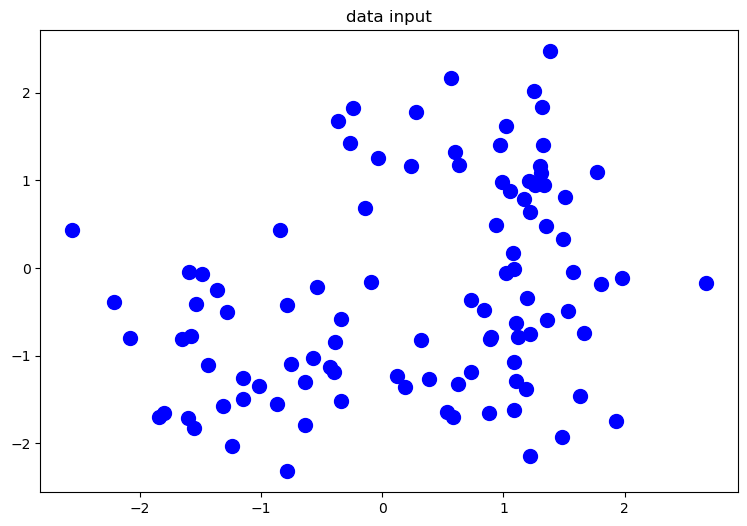

In [8]:
plt.figure(figsize = (9, 6))
plt.title('data input')
plt.scatter(X[:, 0], X[:, 1], color = 'blue', s = 100)
plt.show()

In [9]:
def k_means_init(X, n_cluster):
    n_samples, n_features = X.shape
    centroid = np.empty((n_cluster, n_features), dtype = X.dtype)
    avg_point = sum(X) / len(X)
    first_id = np.argmax(euclidean_distances([avg_point], X, squared = True))
    centroid[0] = X[first_id]
    for i in range(1, n_cluster):
        center_id = np.argmax(np.min(euclidean_distances(centroid[:i], X, squared = True), axis = 0))
        centroid[i] = X[center_id]
    return centroid.tolist()
n_centroid = k_means_init(X, 3)
print(n_centroid)

[[1.3836252481600562, 2.472385503005777], [-1.8436371976200112, -1.693538693248048], [1.930981677439216, -1.7409580279152177]]


In [10]:
def k_means(X, n_cluster):
    samples = X.shape[0]
    best_centroid = None
    curr_centroid = k_means_init(X, n_cluster)
    samples_label = np.empty(samples, dtype = int)
    while(best_centroid != curr_centroid):
        best_centroid = curr_centroid
        distance = euclidean_distances(X, best_centroid, squared = True)
        for i in range(samples):
            samples_label[i] = np.argmin(distance[i])
        for i in range(n_cluster):
            idx = np.where(samples_label == i)[0]
            curr_label_i = X[idx]
            curr_centroid[i] = sum(curr_label_i) / len(curr_label_i)
            curr_centroid[i] = curr_centroid[i].tolist()
    return np.asarray(best_centroid), samples_label
kmean, label = k_means(X, 3)
print(kmean)

[[ 0.8610048   1.25934367]
 [-1.13949326 -0.97100768]
 [ 1.12129576 -0.87895976]]


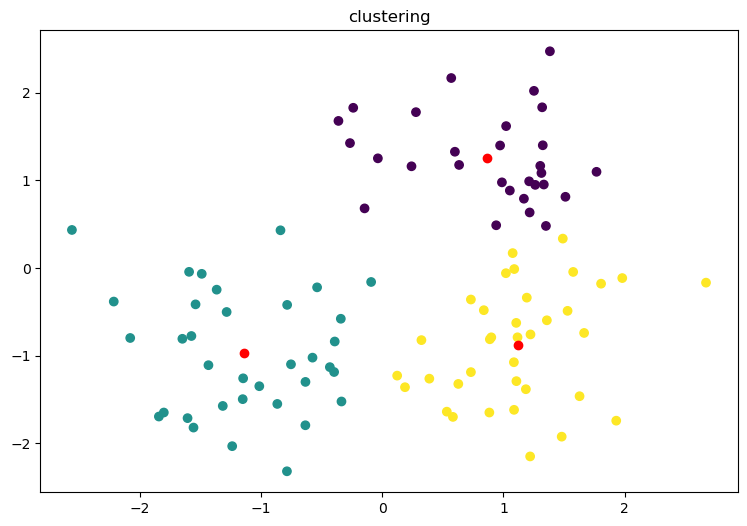

In [11]:
plt.figure(figsize = (9, 6))
plt.title("clustering")
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.scatter(kmean[:, 0], kmean[:, 1], c = 'r')
plt.show()

In [12]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.display import Image, display

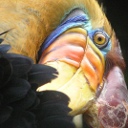

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [13]:
path_img = 'bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1,img.shape[2])
img_shape = img.shape
print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

In [25]:
n_color = 10
best_centroid, label = k_means(data_img, n_cluster = n_color)
img_128 = best_centroid[label]
img_128=np.reshape(img_128, img_shape)
image.imsave('img_128.png', img_128)
kmean = KMeans(n_clusters = n_color, init = 'k-means++', n_init = 'auto')
labels = kmean.fit(data_img)
lib_best_centroid = kmean.cluster_centers_
lib_label = kmean.labels_
img128 = lib_best_centroid[lib_label]
img128 = np.reshape(img128, img_shape)
image.imsave('img128.png', img128)

Ảnh nén bằng K-means tự viết


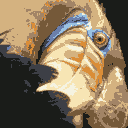

Ảnh nén bằng K-means của thư viện 


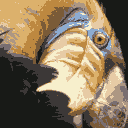

Ảnh gốc


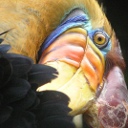

In [26]:
print('Ảnh nén bằng K-means tự viết')
display(Image('img_128.png', width=250, unconfined=True))
print('Ảnh nén bằng K-means của thư viện ')
display(Image('img128.png', width=250, unconfined=True))
print('Ảnh gốc')
display(Image(path_img, width=250, unconfined=True))